In [2]:
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load workbook
wb = openpyxl.load_workbook('NewWorkbook.xlsx')
# Using pandas to read the workbook and assign to dataframe
df = pd.read_excel('NewWorkbook.xlsx')

In [4]:
# Searches the rows in the dataframe where rows contain Levi Martinez and assign to levi_df 
levi_df = df[df['Name'] == 'Levi Martinez']

In [5]:
# Specifying the way days should be ordered when found, and assisnging to custom_day_order
custom_day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]

In [6]:
# Fills all the NaN(Not-a-Number) with 0 in Count column
df['Count'] = df['Count'].fillna(0)

In [7]:
levi_df['Count'] = levi_df['Count'].fillna(0)

C:\Users\luna_\AppData\Local\Temp\ipykernel_44396\1771088354.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  levi_df['Count'] = levi_df['Count'].fillna(0)


In [8]:
# Select rows from dataframe where these certain target behaviors are present.
target_behaviors = ['Non-compliance', 'Verbal Aggression', 'Physical Aggression']
levi_target_df = levi_df[levi_df['Target Behavior'].isin(target_behaviors)]

In [9]:
# Fills NaN with 0
levi_target_df['Count'] = levi_target_df['Count'].fillna(0)

In [10]:
# Convert the 'Day' column to a categorical data type with the custom order
levi_target_df['Day'] = pd.Categorical(levi_target_df['Day'], categories=custom_day_order, ordered=True)

In [11]:
# Sort the DataFrame based on the custom day order
levi_target_df = levi_target_df.sort_values('Day')

In [12]:
# Grouping the data by target behaviors and sum of count

grouped = levi_target_df.groupby(['Day', 'Target Behavior'])['Count'].sum().unstack()

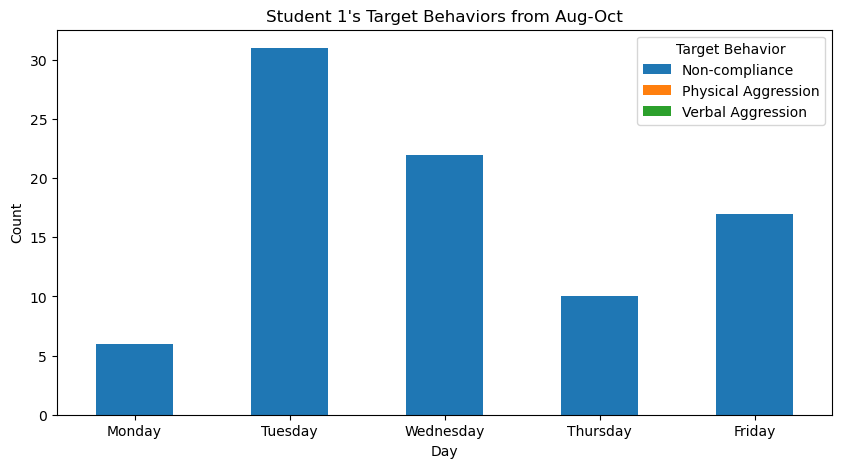

In [13]:
# Create a bar chart
grouped.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title("Student 1's Target Behaviors from Aug-Oct")
plt.xlabel('Day')
plt.ylabel('Count')
plt.legend(title='Target Behavior')
# Rotate the x-axis labels by 360 degrees
plt.xticks(rotation=360)
plt.savefig('Levi_Martinez_Target_Bx.png')
plt.show()

In [14]:
from io import BytesIO
from reportlab.lib.pagesizes import letter
from reportlab.lib import colors
from reportlab.platypus import SimpleDocTemplate, Table, TableStyle, Spacer, Image, Paragraph
from fpdf import FPDF
from reportlab.lib.styles import getSampleStyleSheet


pdf = FPDF()
pdf.add_page()

# Define the title of the PDF report
pdf_title = "Student 1's October Benchmark"

# Function to create a PDF report
def create_pdf_report(chart, df, filename):
    # Create a PDF document
    doc = SimpleDocTemplate(filename, pagesize=letter)
    
    pdf.image('Levi_Martinez_Target_Bx.png')

    # Create a list to hold the elements of the PDF report
    elements = []
    
    # Create a style for the title
    styles = getSampleStyleSheet()
    title_style = styles['Title']
    title_style.alignment = 1  # Centered title
    title = Paragraph(pdf_title, title_style)
    
    # Add the title to the PDF report
    elements.append(title)

    # Add the chart to the PDF report
    elements.append(Image('Levi_Martinez_Target_Bx.png', width=500, height=250))

    # Add a line break
    elements.append(Spacer(1, 20))

    # Create a table for target behaviors count (Monday - Friday)
    table_data = [['Day', 'Count']]

    # Calculate the count of target behaviors for each day
    for day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']:
        day_count = df[df['Day'] == day]['Count'].sum()
        table_data.append([day, day_count])

    # Create a table from the data
    table = Table(table_data)

    # Apply table styles
    style = TableStyle([
        ('BACKGROUND', (0, 0), (-1, 0), colors.white),
        ('TEXTCOLOR', (0, 0), (-1, 0), colors.black),
        ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
        ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
        ('BOTTOMPADDING', (0, 0), (-1, 0), 12),
        ('BACKGROUND', (0, 1), (-1, -1), colors.white),
        ('GRID', (0, 0), (-1, -1), 1, colors.black)
    ])

    table.setStyle(style)

    # Add the table to the elements list
    elements.append(table)

    # Create a table for summary statistics (Min, Max, Mean, etc.)
    summary_data = [['Statistic', 'Value']]

    # Calculate summary statistics for target behaviors
    summary_data.append(['Min', df['Count'].min()])
    # Calculate the minimum for non-zero values in the "Count" column, when the target behavior did occur
    min_non_zero = df[df['Count'] != 0.0]['Count'].min()
    summary_data.append(['Min (Days Target Behavior Occured)', min_non_zero])
    summary_data.append(['Max', df['Count'].max()])
    summary_data.append(['Mean', df['Count'].mean()])
    # Calculate the median for non-zero values in the "Count" column
    median_non_zero = df[df['Count'] != 0.0]['Count'].median()
    summary_data.append(['Median (Days Target Behavior Occured)', median_non_zero])
    # Calculate meadian when target behavior did occur
    summary_data.append(['Median', df['Count'].median()])
    summary_data.append(['Standard Deviation', df['Count'].std()])

    # Create a table from the summary data
    summary_table = Table(summary_data)

    # Apply table styles for the summary table
    summary_style = TableStyle([
        ('BACKGROUND', (0, 0), (-1, 0), colors.white),
        ('TEXTCOLOR', (0, 0), (-1, 0), colors.black),
        ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
        ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
        ('BOTTOMPADDING', (0, 0), (-1, 0), 12),
        ('BACKGROUND', (0, 1), (-1, -1), colors.white),
        ('GRID', (0, 0), (-1, -1), 1, colors.black)
    ])

    summary_table.setStyle(summary_style)

    # Add the summary statistics table to the elements list
    elements.append(Spacer(1, 20))
    elements.append(summary_table)

    # Build the PDF document
    doc.build(elements)

# Create a chart (update with Levi's data)
chart = plt.figure()

# Save the chart to a BytesIO object
buffer = BytesIO()
plt.savefig(buffer, format='png')
plt.close()

# Create a PDF report for Levi Martinez using his DataFrame (levi_df)
create_pdf_report(chart, levi_df, 'Levi_Martinez_Report.pdf')

NameError: name 'chart' is not defined